<a href="https://colab.research.google.com/github/2303A51449/ADM_LAB/blob/main/LAB(1)_ADM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '/content/TESLA.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [13]:
# Drop the 'Unnamed: 0' column as it is redundant
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


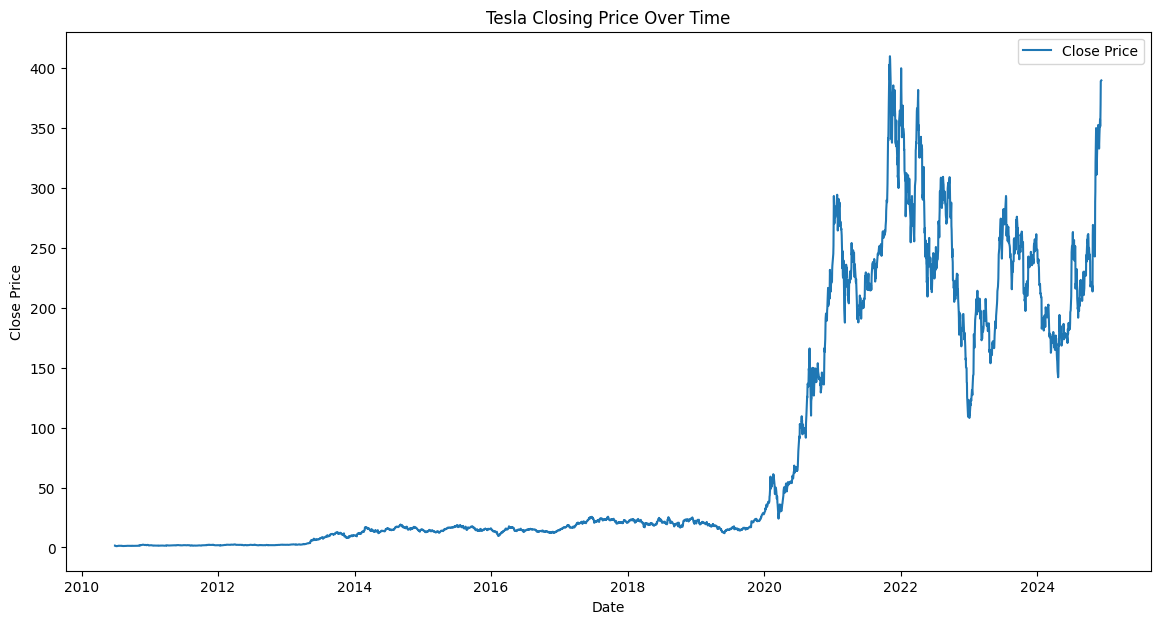

In [14]:
# Plotting the closing price over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Close', label='Close Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

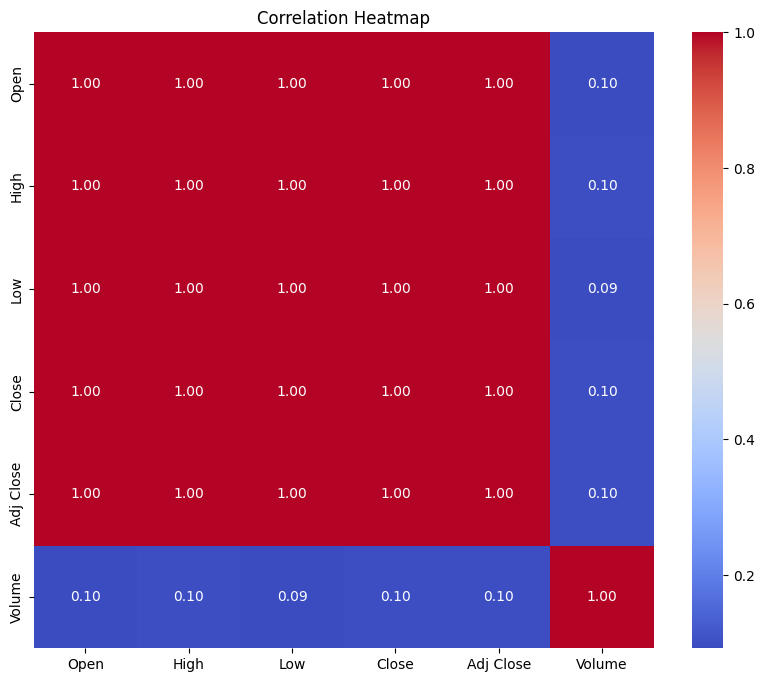

In [15]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Create a new feature for daily price range
df['Price_Range'] = df['High'] - df['Low']

# Create a new feature for daily price change
df['Price_Change'] = df['Close'] - df['Open']

# Display the first few rows with new features
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Range,Price_Change
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.497334,0.326000
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.474667,-0.130666
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.376667,-0.202667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.292667,-0.253333
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.278000,-0.259333


In [17]:
print("\nSummary Statistics:");
print(df.describe())


Summary Statistics:
                                Date         Open         High          Low  \
count                           3637  3637.000000  3637.000000  3637.000000   
mean   2017-09-17 12:05:20.703876864    80.080574    81.832710    78.219276   
min              2010-06-29 00:00:00     1.076000     1.108667     0.998667   
25%              2014-02-07 00:00:00    12.046667    12.320000    11.746667   
50%              2017-09-18 00:00:00    17.833332    18.080000    17.563999   
75%              2021-04-29 00:00:00   176.070007   179.770004   173.169998   
max              2024-12-09 00:00:00   411.470001   414.496674   405.666656   
std                              NaN   105.466131   107.807170   102.931208   

             Close    Adj Close        Volume  Price_Range  Price_Change  
count  3637.000000  3637.000000  3.637000e+03  3637.000000   3637.000000  
mean     80.067952    80.067952  9.667330e+07     3.613433     -0.012622  
min       1.053333     1.053333  1.777500e

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Price_Range', 'Price_Change']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.690815768388777e-17
R-squared: 1.0
